In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
cd /content/drive/My\ Drive

/content/drive/My Drive


In [0]:
#ls

In [0]:
# dataset for multiclass classification using keras

In [0]:
!mkdir BrainTumrDataset

In [6]:

import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

#Start
train_data_path = 'BrainTumrDataset/train'
test_data_path = 'BrainTumrDataset/val'
img_rows = 150
img_cols = 150
epochs = 30
batch_size = 32
num_of_train_samples = 3000
num_of_test_samples = 600

#Image Generator
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(test_data_path,
                                                        target_size=(img_rows, img_cols),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 2450 images belonging to 3 classes.
Found 305 images belonging to 3 classes.


In [7]:
images, labels=next(train_generator)
print(images.shape)
print(labels.shape)

(32, 150, 150, 3)
(32, 3)


In [0]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

32
[0. 0. 1.]


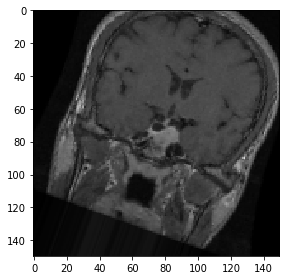

[1. 0. 0.]


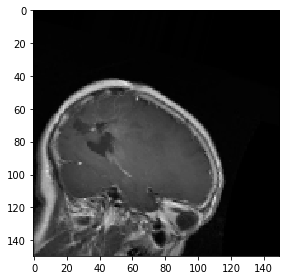

[1. 0. 0.]


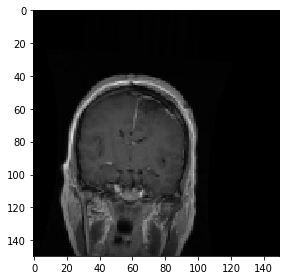

[1. 0. 0.]


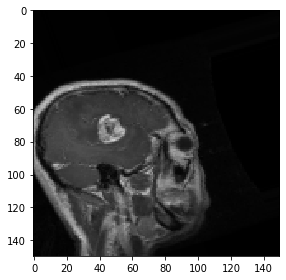

[0. 0. 1.]


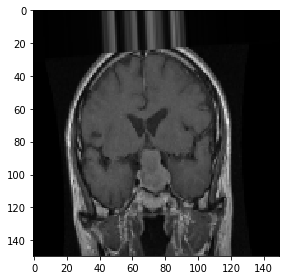

[1. 0. 0.]


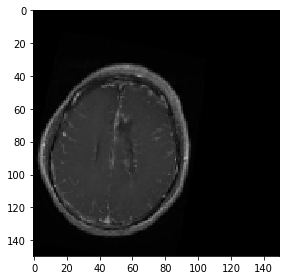

[0. 1. 0.]


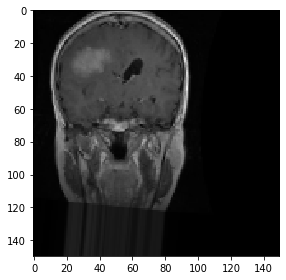

[0. 1. 0.]


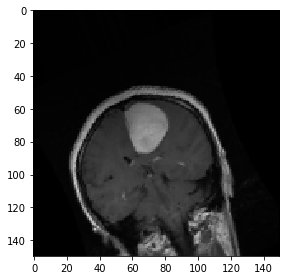

[0. 1. 0.]


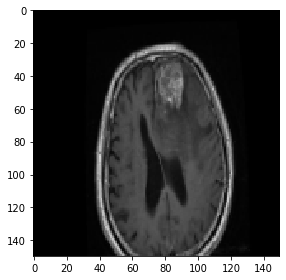

[1. 0. 0.]


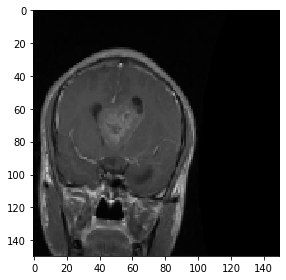

[1. 0. 0.]


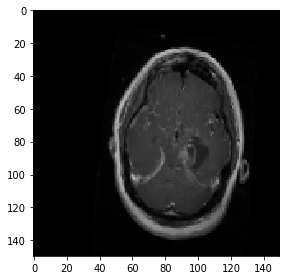

[1. 0. 0.]


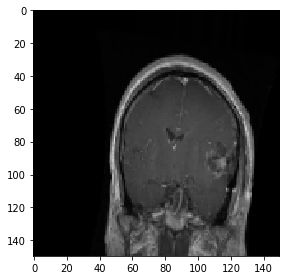

[1. 0. 0.]


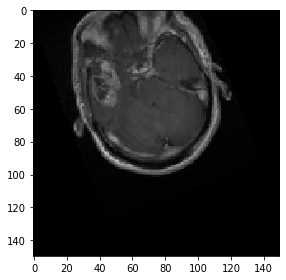

[1. 0. 0.]


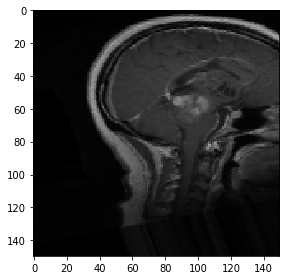

[0. 1. 0.]


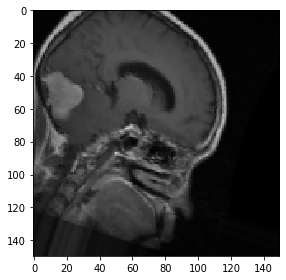

[1. 0. 0.]


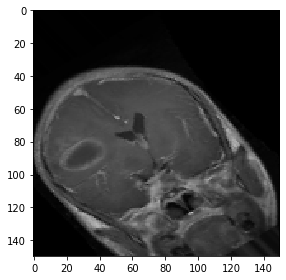

[0. 1. 0.]


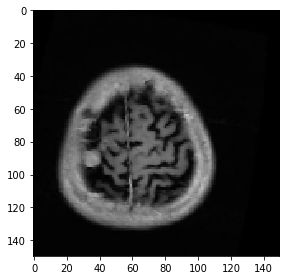

[1. 0. 0.]


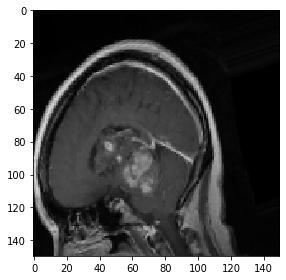

[0. 1. 0.]


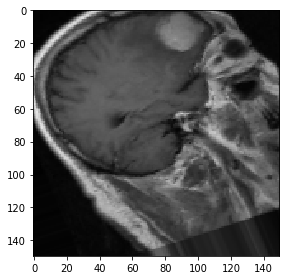

[0. 0. 1.]


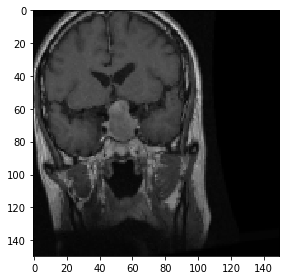

[0. 0. 1.]


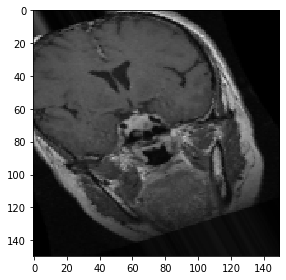

[0. 1. 0.]


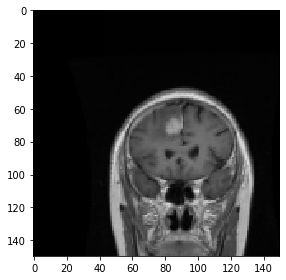

[1. 0. 0.]


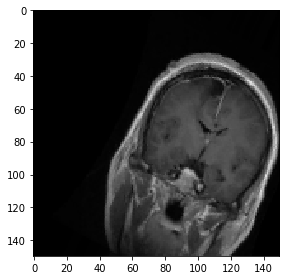

[1. 0. 0.]


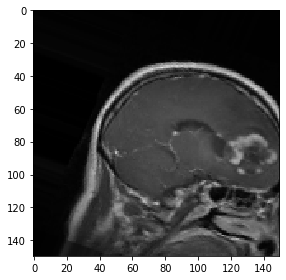

[0. 1. 0.]


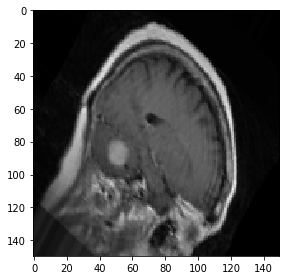

[0. 0. 1.]


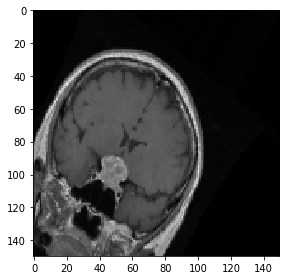

[0. 0. 1.]


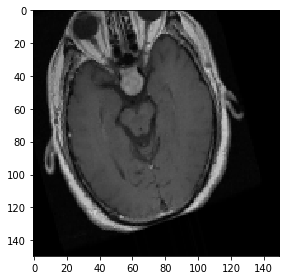

[1. 0. 0.]


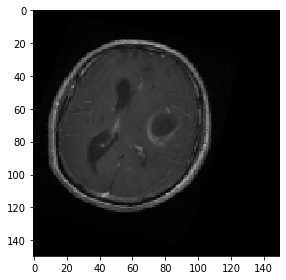

[1. 0. 0.]


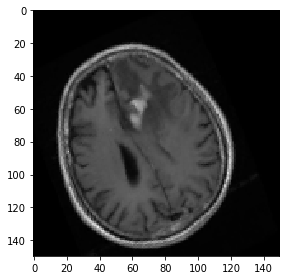

[1. 0. 0.]


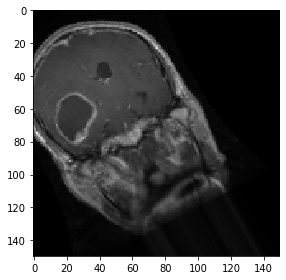

[0. 1. 0.]


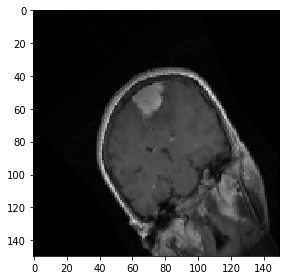

[1. 0. 0.]


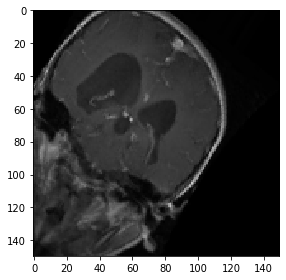

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [13]:
num_of_train_samples=2450
num_of_test_samples=305
# Build model
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_rows, img_cols, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#Train
history=model.fit_generator(train_generator,
                    steps_per_epoch=num_of_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_of_test_samples // batch_size)


Epoch 1/30


KeyboardInterrupt: ignored

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.save('myfirstmodel.h5')

In [0]:
loaded_model = tf.keras.models.load_model('myfirstmodel.h5')
loaded_model.layers[0].input_shape #(None, 160, 160, 3)

In [0]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Cats', 'Dogs', 'Horse']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [0]:
## Now Predict
from os import listdir
from os.path import isfile, join
predict_dir_path='BrainTumrDataset/test/glioma'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

In [0]:
# predicting images
from keras.preprocessing import image
import os
import numpy as np
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(os.path.join(predict_dir_path,file), target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    print(classes)